In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.ExcelFile('KPMG_VI_New_raw_data_update_final (2).xlsx')

## Data Cleaning

In [4]:
df1=pd.read_excel(df,'Transactions',skiprows=1)

In [5]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
df1.dropna(axis=0,subset=['brand'],inplace=True)

In [8]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [9]:
df1['online_order'].fillna('unspecified',inplace = True)
df1.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19803 non-null int64
product_id                 19803 non-null int64
customer_id                19803 non-null int64
transaction_date           19803 non-null datetime64[ns]
online_order               19803 non-null object
order_status               19803 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 19803 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 2.1+ MB


In [11]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
df2=pd.read_excel(df,'NewCustomerList',skiprows=1)

In [13]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [4]:
df2['last_name'].fillna('',inplace = True)

In [5]:
df2['name']=df2['first_name']+" "+df2['last_name']

In [6]:
import datetime
df2['DOB'] = pd.to_datetime(df2['DOB'])
now = pd.Timestamp('now')
df2['age'] = ((now - df2['DOB'])/365).dt.days

In [17]:
df2.drop(['DOB','first_name','last_name','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)

In [18]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

gender                                   0
past_3_years_bike_related_purchases      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
name                                     0
age                                     17
dtype: int64

In [19]:
df2[df2['age'] > 80]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,name,age
18,Female,65,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,NSW,Australia,11,19,1.531250,Odilia Quick,81.0
176,Female,79,Research Associate,NaN,High Net Worth,N,Yes,9,534 Lien Lane,3122,VIC,Australia,7,177,1.162500,Devonne Alderwick,81.0
191,Male,55,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,191,1.150000,Franklin Wohler,81.0
237,Female,30,Director of Sales,NaN,Mass Customer,N,Yes,8,811 Melrose Park,2224,NSW,Australia,10,237,1.094375,Mariquilla Springthorpe,81.0
255,Female,17,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,16,0474 Bowman Hill,3031,VIC,Australia,10,252,1.073125,Dyann Olechnowicz,81.0
265,Female,56,NaN,NaN,Mass Customer,N,No,10,343 Lakewood Center,2089,NSW,Australia,12,259,1.062500,Alleen Eaken,81.0
406,Male,21,Graphic Designer,Health,Mass Customer,N,No,19,082 Welch Lane,2089,NSW,Australia,11,405,0.930000,Kippar Brimilcome,81.0
414,Male,37,NaN,Manufacturing,Mass Customer,N,No,9,79 Armistice Junction,2765,NSW,Australia,9,415,0.921875,Wyn Meach,81.0
482,Female,13,Account Representative IV,Retail,Affluent Customer,N,No,13,98555 Victoria Hill,2171,NSW,Australia,7,483,0.876563,Tina Dunstan,81.0
585,Female,27,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.787500,Letizia Poore,81.0


In [20]:
df3 = pd.read_excel(df,'CustomerDemographic',skiprows=1)
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [9]:
df2.to_excel(r'2.xlsx', index = False)

In [21]:
df3.apply(lambda x: sum(x.isnull()),axis=0)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [22]:
df3['last_name'].fillna('',inplace = True)
df3['name']=df3['first_name']+" "+df3['last_name']

In [23]:
val = {"Female":"F","Femal":"F", "Male":"M"}

In [24]:
for ind in df3.index: 
    str_a = df3['gender'][ind] 
    new_string = ' '.join([val.get(i, i) for i in str_a.split()])
    df3.loc[ind, 'gender'] = new_string

In [25]:
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,name
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,Laraine Medendorp
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,Eli Bockman
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,Arlin Dearle
3,4,Talbot,,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,Talbot
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,Sheila-kathryn Calton


In [27]:
#df3[df3['age'] >90]

In [28]:
df3['DOB'] = df3['DOB'].mask(df3['DOB'].dt.year == 1843, df3['DOB'] + pd.offsets.DateOffset(year=1943))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


In [29]:
df3['DOB'] = pd.to_datetime(df3['DOB'])
now = pd.Timestamp('now')
df3['age'] = ((now - df3['DOB'])/365).dt.days

In [30]:
df3[df3['age'] >90]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,name,age


In [31]:
df3.apply(lambda x: sum(x.isnull()),axis=0)

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
name                                     0
age                                     87
dtype: int64

In [32]:
df3.drop(['DOB','first_name','last_name','default'],axis=1,inplace=True)

In [33]:
df3['tenure'].fillna(df3['tenure'].median(),inplace=True)

In [34]:
df3.dropna(axis=0,subset=['age'],inplace=True)

In [35]:
df3.fillna('n/a',inplace=True)

In [36]:
df3.apply(lambda x: sum(x.isnull()),axis=0)

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
name                                   0
age                                    0
dtype: int64

In [37]:
df4 = pd.read_excel(df,'CustomerAddress',skiprows=1)
df4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [38]:
df4.apply(lambda x: sum(x.isnull()),axis=0)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [39]:
df4['state'] = df4['state'].replace('New South Wales','NSW')
df4['state'] = df4['state'].replace('Victoria','VIC')
df4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Data Transformation

In [40]:
df2.drop(['deceased_indicator','address','postcode','name'],axis='columns',inplace = True)

In [41]:
df2.drop(['country'],axis='columns',inplace = True)

In [42]:
df2.fillna('n/a',inplace=True)

In [43]:
df2.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Rank,Value,age
0,Male,86,General Manager,Manufacturing,Mass Customer,Yes,14,QLD,6,1,1.718750,63
1,Male,69,Structural Engineer,Property,Mass Customer,No,16,NSW,11,1,1.718750,50
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,VIC,5,1,1.718750,45
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,Yes,5,QLD,1,4,1.703125,41
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,19,NSW,9,4,1.703125,54


In [44]:
df2["gender"] = df2["gender"].astype('category')
df2["gender"] = df2["gender"].cat.codes

In [45]:
df2["owns_car"] = df2["owns_car"].astype('category')
df2["owns_car"] = df2["owns_car"].cat.codes

In [46]:
level = {'Mass Customer': 1, 'Affluent Customer': 2, 'High Net Worth': 3}

In [47]:
df2['wealth_segment'] = df2['wealth_segment'].replace(level)

In [48]:
df2 = pd.get_dummies(df2, prefix=['state'], columns=['state'])

In [49]:
df2.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,Rank,Value,age,state_NSW,state_QLD,state_VIC
0,1,86,General Manager,Manufacturing,1,1,14,6,1,1.718750,63,0,1,0
1,1,69,Structural Engineer,Property,1,0,16,11,1,1.718750,50,1,0,0
2,0,10,Senior Cost Accountant,Financial Services,2,0,10,5,1,1.718750,45,0,0,1
3,0,64,Account Representative III,Manufacturing,2,1,5,1,4,1.703125,41,0,1,0
4,0,34,Financial Analyst,Financial Services,2,0,19,9,4,1.703125,54,1,0,0


In [50]:
df2['job_title'].value_counts()

n/a                                     106
Associate Professor                      15
Environmental Tech                       14
Software Consultant                      14
Chief Design Engineer                    13
VP Sales                                 12
Assistant Manager                        12
Cost Accountant                          12
Assistant Media Planner                  12
Senior Sales Associate                   12
Account Executive                        11
Environmental Specialist                 11
Social Worker                            11
Junior Executive                         11
Payment Adjustment Coordinator           11
VP Quality Control                       11
VP Marketing                             11
Nurse Practicioner                       11
Human Resources Manager                  10
Chemical Engineer                        10
Librarian                                10
Financial Analyst                        10
Dental Hygienist                

In [51]:
df2.drop(['job_title'],axis='columns',inplace = True)

In [52]:
df2['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
n/a                   165
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [8]:
df2 = df2[df2.job_industry_category != 'n/a']

In [54]:
df2['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [55]:
df2 = pd.get_dummies(df2, prefix=['job_category'], columns=['job_industry_category'])

In [56]:
df2.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,property_valuation,Rank,Value,age,state_NSW,...,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications
0,1,86,1,1,14,6,1,1.718750,63,0,...,0,0,0,0,0,0,1,0,0,0
1,1,69,1,0,16,11,1,1.718750,50,1,...,0,0,0,0,0,0,0,1,0,0
2,0,10,2,0,10,5,1,1.718750,45,0,...,1,0,0,1,0,0,0,0,0,0
3,0,64,2,1,5,1,4,1.703125,41,0,...,0,0,0,0,0,0,1,0,0,0
4,0,34,2,0,19,9,4,1.703125,54,1,...,0,0,0,1,0,0,0,0,0,0


In [57]:
cust = pd.merge(df3,df4, on='customer_id',how='inner')
cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,name,age,address,postcode,state,country,property_valuation
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,66.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman,39.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,M,33,n/a,IT,Mass Customer,N,No,7.0,Talbot,58.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,F,56,Senior Editor,n/a,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton,43.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,M,35,n/a,Retail,High Net Worth,N,Yes,13.0,Curr Duckhouse,53.0,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
df1['revenue'] = df1['list_price'] - df1['standard_cost']
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,revenue
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [61]:
total = round(df1.groupby(["customer_id"])["revenue"].sum(),2)

In [62]:
total

customer_id
1       3018.09
2       2226.26
3       3362.81
4        220.57
5       2394.94
6       3946.55
7        220.11
8       7066.94
9       2353.11
10      3358.28
11      3638.84
12      3540.03
13      4337.38
14      1713.90
15      1728.39
16      4521.84
17      2015.61
18      3543.38
19      2951.79
20      3608.28
21      4229.41
22      5159.84
23      4376.15
24      3689.35
25      5333.66
26       268.24
27      3274.25
28      3366.56
29      6175.30
30      2633.95
         ...   
3472    2779.58
3473    1504.21
3474    2358.99
3475    2515.14
3476    1152.36
3477    4401.92
3478    4297.85
3479    2265.96
3480    1770.26
3481    2438.45
3482    5549.59
3483    2193.04
3484    5924.55
3485    2491.47
3486    2972.34
3487    1837.75
3488     815.95
3489    2644.44
3490    2379.57
3491    1430.28
3492    2193.81
3493    3728.88
3494    2755.11
3495    3847.65
3496    2045.84
3497    1648.32
3498    3147.33
3499    4955.25
3500    1785.86
5034     269.48
Name: revenu

In [64]:
final = pd.merge(cust,total, on='customer_id',how='inner')
final.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,name,age,address,postcode,state,country,property_valuation,revenue
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,66.0,060 Morning Avenue,2016,NSW,Australia,10,3018.09
1,2,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman,39.0,6 Meadow Vale Court,2153,NSW,Australia,10,2226.26
2,4,M,33,n/a,IT,Mass Customer,N,No,7.0,Talbot,58.0,0 Holy Cross Court,4211,QLD,Australia,9,220.57
3,5,F,56,Senior Editor,n/a,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton,43.0,17979 Del Mar Point,2448,NSW,Australia,4,2394.94
4,6,M,35,n/a,Retail,High Net Worth,N,Yes,13.0,Curr Duckhouse,53.0,9 Oakridge Court,3216,VIC,Australia,9,3946.55


In [65]:
final["gender"] = final["gender"].astype('category')
final["gender"] = final["gender"].cat.codes

In [66]:
final["owns_car"] = final["owns_car"].astype('category')
final["owns_car"] = final["owns_car"].cat.codes

In [67]:
level = {'Mass Customer': 1, 'Affluent Customer': 2, 'High Net Worth': 3}

In [68]:
final['wealth_segment'] = final['wealth_segment'].replace(level)

In [69]:
final = pd.get_dummies(final, prefix=['state'], columns=['state'])

In [70]:
final.drop(['deceased_indicator','address','postcode','name','job_title','country'],axis='columns',inplace = True)

In [71]:
final = final[final.job_industry_category != 'n/a']

In [72]:
final['job_industry_category'].value_counts()

Manufacturing         701
Financial Services    679
Health                526
Retail                304
Property              230
IT                    127
Entertainment         123
Argiculture           100
Telecommunications     63
Name: job_industry_category, dtype: int64

In [73]:
final = pd.get_dummies(final, prefix=['job_category'], columns=['job_industry_category'])

In [74]:
final.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,property_valuation,revenue,state_NSW,...,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications
0,1,0,93,1,1,11.0,66.0,10,3018.09,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,81,1,1,16.0,39.0,10,2226.26,1,...,0,0,0,1,0,0,0,0,0,0
2,4,1,33,1,0,7.0,58.0,9,220.57,0,...,0,0,0,0,0,1,0,0,0,0
4,6,1,35,3,1,13.0,53.0,9,3946.55,0,...,1,0,0,0,0,0,0,0,1,0
5,7,0,6,2,1,11.0,44.0,9,220.11,1,...,0,0,0,1,0,0,0,0,0,0


In [75]:
final.describe()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,property_valuation,revenue,state_NSW,...,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications
count,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,...,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000
mean,1743.381353,0.488608,48.904662,1.756046,0.509639,10.751490,42.337189,7.493516,3112.518388,0.533474,...,0.252366,0.035051,0.043113,0.237995,0.184367,0.044515,0.245706,0.080617,0.106555,0.022082
std,1013.403977,0.500659,28.562302,0.834101,0.499995,5.694502,12.608069,2.836791,1780.734616,0.498966,...,0.434446,0.183941,0.203146,0.425931,0.387851,0.206271,0.430581,0.272294,0.308600,0.146976
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,18.000000,1.000000,15.080000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,856.000000,0.000000,24.000000,1.000000,0.000000,6.000000,33.000000,6.000000,1823.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1731.000000,0.000000,48.000000,2.000000,1.000000,11.000000,42.000000,8.000000,2843.510000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2626.000000,1.000000,73.000000,3.000000,1.000000,16.000000,52.000000,10.000000,4162.970000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3500.000000,2.000000,99.000000,3.000000,1.000000,22.000000,88.000000,12.000000,11668.950000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


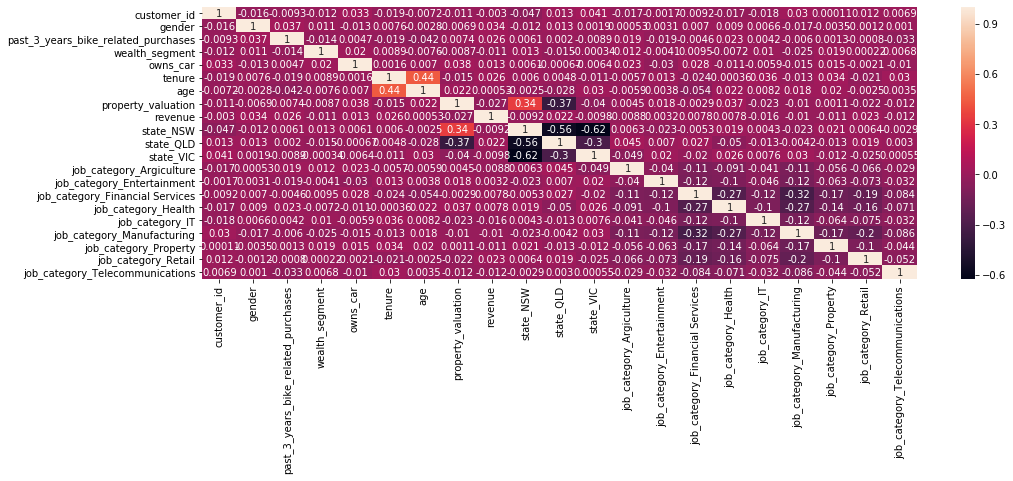

In [76]:
import seaborn as sn
corrMatrix = final.corr()
plt.figure(figsize = (16,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [77]:
final.drop(['customer_id'],axis='columns',inplace = True)

In [80]:
train=final.copy()

In [82]:
test=df2.copy()
test.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,property_valuation,Rank,Value,age,state_NSW,...,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications
0,1,86,1,1,14,6,1,1.718750,63,0,...,0,0,0,0,0,0,1,0,0,0
1,1,69,1,0,16,11,1,1.718750,50,1,...,0,0,0,0,0,0,0,1,0,0
2,0,10,2,0,10,5,1,1.718750,45,0,...,1,0,0,1,0,0,0,0,0,0
3,0,64,2,1,5,1,4,1.703125,41,0,...,0,0,0,0,0,0,1,0,0,0
4,0,34,2,0,19,9,4,1.703125,54,1,...,0,0,0,1,0,0,0,0,0,0


In [83]:
test.drop(['Rank','Value'],axis='columns',inplace = True)

In [81]:
train.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,property_valuation,revenue,state_NSW,state_QLD,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications
0,0,93,1,1,11.0,66.0,10,3018.09,1,0,0,0,0,0,1,0,0,0,0,0
1,1,81,1,1,16.0,39.0,10,2226.26,1,0,0,0,0,1,0,0,0,0,0,0
2,1,33,1,0,7.0,58.0,9,220.57,0,1,0,0,0,0,0,1,0,0,0,0
4,1,35,3,1,13.0,53.0,9,3946.55,0,0,1,0,0,0,0,0,0,0,1,0
5,0,6,2,1,11.0,44.0,9,220.11,1,0,0,0,0,1,0,0,0,0,0,0


In [85]:
train.shape

(2853, 20)

In [86]:
test.shape

(835, 19)

In [87]:
train.to_excel(r'train.xlsx', index = False)

In [297]:
dataset=pd.read_excel('train.xlsx')

In [298]:
dataset.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,property_valuation,state_NSW,state_QLD,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications,revenue
0,0,93,1,1,11,66,10,1,0,0,0,0,0,1,0,0,0,0,0,3018.09
1,1,81,1,1,16,39,10,1,0,0,0,0,1,0,0,0,0,0,0,2226.26
2,1,33,1,0,7,58,9,0,1,0,0,0,0,0,1,0,0,0,0,220.57
3,1,35,3,1,13,53,9,0,0,1,0,0,0,0,0,0,0,1,0,3946.55
4,0,6,2,1,11,44,9,1,0,0,0,0,1,0,0,0,0,0,0,220.11


In [274]:
#dataset.drop(['state_NSW','job_category_Argiculture'],axis='columns',inplace = True)

In [307]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [308]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_Y = StandardScaler()
#X3 = dataset.iloc[:, :-1].values
#Y3 = dataset.iloc[:, -1].values
#X3 = sc_X.fit_transform(X3)

In [309]:
#Y3 = Y3.reshape(-1,1)
#Y3 = sc_Y.fit_transform(Y3)

In [232]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [215]:
test.to_excel(r'test.xlsx', index = False)

In [255]:
testing=pd.read_excel('test.xlsx')
test.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,property_valuation,age,state_NSW,state_QLD,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications
0,1,86,1,1,14,6,63,0,1,0,0,0,0,0,0,1,0,0,0
1,1,69,1,0,16,11,50,1,0,0,0,0,0,0,0,0,1,0,0
2,0,10,2,0,10,5,45,0,0,1,0,0,1,0,0,0,0,0,0
3,0,64,2,1,5,1,41,0,1,0,0,0,0,0,0,1,0,0,0
4,0,34,2,0,19,9,54,1,0,0,0,0,1,0,0,0,0,0,0


In [257]:
test.dtypes

gender                                   int8
past_3_years_bike_related_purchases     int64
wealth_segment                          int64
owns_car                                 int8
tenure                                  int64
property_valuation                      int64
age                                    object
state_NSW                               uint8
state_QLD                               uint8
state_VIC                               uint8
job_category_Argiculture                uint8
job_category_Entertainment              uint8
job_category_Financial Services         uint8
job_category_Health                     uint8
job_category_IT                         uint8
job_category_Manufacturing              uint8
job_category_Property                   uint8
job_category_Retail                     uint8
job_category_Telecommunications         uint8
dtype: object

In [260]:
test.dropna(axis=0,subset=['age'],inplace=True)

In [262]:
test.apply(lambda x: sum(x.isnull()),axis=0)

gender                                 0
past_3_years_bike_related_purchases    0
wealth_segment                         0
owns_car                               0
tenure                                 0
property_valuation                     0
age                                    0
state_NSW                              0
state_QLD                              0
state_VIC                              0
job_category_Argiculture               0
job_category_Entertainment             0
job_category_Financial Services        0
job_category_Health                    0
job_category_IT                        0
job_category_Manufacturing             0
job_category_Property                  0
job_category_Retail                    0
job_category_Telecommunications        0
dtype: int64

In [263]:
test = test[test.age != 'n/a']

In [264]:
test = test.apply(pd.to_numeric)

In [265]:
test.dtypes

gender                                    int8
past_3_years_bike_related_purchases      int64
wealth_segment                           int64
owns_car                                  int8
tenure                                   int64
property_valuation                       int64
age                                    float64
state_NSW                                uint8
state_QLD                                uint8
state_VIC                                uint8
job_category_Argiculture                 uint8
job_category_Entertainment               uint8
job_category_Financial Services          uint8
job_category_Health                      uint8
job_category_IT                          uint8
job_category_Manufacturing               uint8
job_category_Property                    uint8
job_category_Retail                      uint8
job_category_Telecommunications          uint8
dtype: object

In [258]:
dataset.dtypes

gender                                   int64
past_3_years_bike_related_purchases      int64
wealth_segment                           int64
owns_car                                 int64
tenure                                   int64
age                                      int64
property_valuation                       int64
state_NSW                                int64
state_QLD                                int64
state_VIC                                int64
job_category_Argiculture                 int64
job_category_Entertainment               int64
job_category_Financial Services          int64
job_category_Health                      int64
job_category_IT                          int64
job_category_Manufacturing               int64
job_category_Property                    int64
job_category_Retail                      int64
job_category_Telecommunications          int64
revenue                                float64
dtype: object

## Random Forest Regression

In [322]:
# Fitting Random Forest Regression to dataset
#Dataset is too small
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10000, random_state=0) #n_estimators=no. of decision trees
regressor.fit(X, Y.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [315]:
Y_pred1 = regressor.predict(X)

In [316]:
r2_score(Y, Y_pred1)

0.854823544193308

In [317]:
mean_squared_error(Y, Y_pred1)

460195.4724093627

In [318]:
mean_absolute_error(Y, Y_pred1)

534.4301863301797

In [319]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [321]:
mean_absolute_percentage_error(Y, Y_pred1)

49.72869300931109

## TESTING DATASET

In [267]:
Y_pred2 = regressor.predict(test)

In [268]:
Y_pred2

array([3995.70111, 4169.75338, 3986.27538, 3267.63279, 2811.6311 ,
       3276.02215, 3454.91746, 4587.25856, 3527.90962, 3798.35071,
       3994.4295 , 3968.36809, 4193.53479, 3027.17177, 3791.33108,
       3540.2981 , 3420.36535, 3679.77476, 4163.5894 , 3163.09137,
       3514.76735, 3922.44621, 3537.88113, 3465.16451, 3345.40893,
       3200.37643, 3853.98006, 3621.95928, 4104.84113, 4279.47788,
       3977.93158, 3185.22813, 4050.47221, 3925.42343, 3702.84877,
       3885.00893, 3794.95311, 3561.07869, 4696.44922, 2679.9902 ,
       3366.9302 , 4212.07952, 3191.56998, 3863.3918 , 3464.33829,
       3678.81875, 3447.50031, 4333.39908, 4412.96203, 3769.27331,
       3266.93004, 3633.23193, 3873.82422, 4045.79695, 3099.17126,
       4203.38738, 3213.77451, 4108.05146, 3605.62337, 3527.80622,
       3581.1161 , 3742.15375, 3920.07351, 3462.43119, 3726.87214,
       3665.70897, 3221.50058, 2688.16425, 4053.16578, 3400.3978 ,
       2788.95925, 3783.50521, 3350.01587, 2612.95814, 4011.40

In [269]:
df = pd.DataFrame(test)

In [270]:
df['revenue predict'] = Y_pred2

In [271]:
df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,property_valuation,age,state_NSW,state_QLD,state_VIC,job_category_Argiculture,job_category_Entertainment,job_category_Financial Services,job_category_Health,job_category_IT,job_category_Manufacturing,job_category_Property,job_category_Retail,job_category_Telecommunications,revenue predict
0,1,86,1,1,14,6,63.0,0,1,0,0,0,0,0,0,1,0,0,0,3995.70111
1,1,69,1,0,16,11,50.0,1,0,0,0,0,0,0,0,0,1,0,0,4169.75338
2,0,10,2,0,10,5,45.0,0,0,1,0,0,1,0,0,0,0,0,0,3986.27538
3,0,64,2,1,5,1,41.0,0,1,0,0,0,0,0,0,1,0,0,0,3267.63279
4,0,34,2,0,19,9,54.0,1,0,0,0,0,1,0,0,0,0,0,0,2811.63110


In [323]:
df.to_excel(r'final.xlsx', index = False)